In [23]:
import pandas as pd 
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize 

In [2]:
df=pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
def min_max(val):
    return (val-val.min())/(val.max()-val.min())

In [5]:
df_norm=min_max(df.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


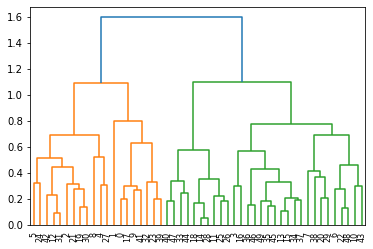

In [6]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method="complete"))

In [7]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [8]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [9]:
df['clustered_id']=y_hc
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clustered_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [10]:
df.clustered_id.value_counts()

0    20
1    20
2    10
Name: clustered_id, dtype: int64

In [11]:
df.groupby("clustered_id").mean()

,Murder,Assault,UrbanPop,Rape
clustered_id,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


# k-means clustering

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaled_df=scalar.fit_transform(df.iloc[:,1:])
scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.5466429 ],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.39002083],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -1.39002083],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.56775499],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -1.39002083],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -1.39002083],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.56775499],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.56775499],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -1.39002083],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.5466429 ],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  0.56775499],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.41113292],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -1.39002083],
       [-0.13637203, -0.70012057, -0.0

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss')

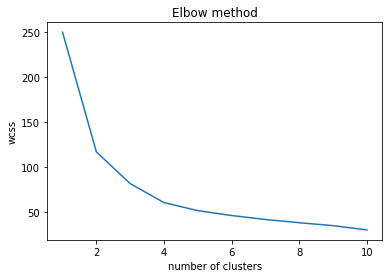

In [15]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")

In [16]:
cluster_new=KMeans(n_clusters=4,random_state=0)
cluster_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [17]:
cluster_new.labels_

array([3, 0, 0, 2, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 2, 3, 1, 0, 2, 0,
       2, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 2, 2])

In [18]:
df['clustered_id']=cluster_new.labels_

In [20]:
df.head() 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clustered_id
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [21]:
df.groupby("clustered_id").mean()

,Murder,Assault,UrbanPop,Rape
clustered_id,,,,
0,10.815385,257.384615,76.000000,33.192308
1,3.180000,78.700000,49.300000,11.630000
2,5.715000,132.300000,70.800000,18.100000
3,14.671429,251.285714,54.285714,21.685714
